In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from main import scraper

In [2]:
# Set default Seaborn style
sns.set()

In [3]:
url = "https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/jeep/renegade/"
items = scraper(url, pagination_limit=50)

[main] [INFO] [27-Aug-20 18:54:46] - Scraping [https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/jeep/renegade/]
[main] [INFO] [27-Aug-20 18:54:47] - Pagination - URL = [https://www.chileautos.cl/vehiculos/autos-vehículo/jeep/renegade/?offset=12]
[main] [INFO] [27-Aug-20 18:54:47] - Scraping [https://www.chileautos.cl/vehiculos/autos-vehículo/jeep/renegade/?offset=12]
[main] [INFO] [27-Aug-20 18:54:48] - Pagination - URL = [https://www.chileautos.cl/vehiculos/autos-vehículo/jeep/renegade/?offset=24]
[main] [INFO] [27-Aug-20 18:54:48] - Scraping [https://www.chileautos.cl/vehiculos/autos-vehículo/jeep/renegade/?offset=24]
[main] [INFO] [27-Aug-20 18:54:50] - Pagination - URL = [https://www.chileautos.cl/vehiculos/autos-vehículo/jeep/renegade/?offset=36]
[main] [INFO] [27-Aug-20 18:54:50] - Scraping [https://www.chileautos.cl/vehiculos/autos-vehículo/jeep/renegade/?offset=36]
[main] [INFO] [27-Aug-20 18:54:51] - Last page!


In [4]:
df = pd.DataFrame(items)
df.head()

,brand,model,net_id,price,state,seller_type,year,odometer,transmission,fuel_type,fuel_economy
0,Jeep,Renegade,CL-AD-8740640,8650000,Metropolitana de Santiago,Automotora Usado,2016,42.000 km,Manual,Bencina,NaN
1,Jeep,Renegade,CL-AD-8736594,9790000,Metropolitana de Santiago,Automotora Usado,2017,17.000 km,Manual,Bencina,"11,8 Kms/Lt."
2,Jeep,Renegade,CL-AD-8565994,10980000,Valparaíso,Automotora Usado,2018,28.000 km,Automática,Bencina,"12,8 Kms/Lt."
3,Jeep,Renegade,CL-AD-8654241,11480000,Metropolitana de Santiago,Automotora Usado,2018,20.000 km,Manual,Bencina,"11,8 Kms/Lt."
4,Jeep,Renegade,CL-AD-8191749,10290000,Metropolitana de Santiago,Automotora Usado,2017,35.000 km,Manual,Bencina,NaN


In [5]:
df.odometer = df.odometer.str.replace('.', '').str.extract('(\d+)')
df.odometer = pd.to_numeric(df.odometer, errors='coerce')
# df.year = pd.to_numeric(df.year, errors='coerce')
df.price = pd.to_numeric(df.price, errors='coerce')
df.head()

,brand,model,net_id,price,state,seller_type,year,odometer,transmission,fuel_type,fuel_economy
0,Jeep,Renegade,CL-AD-8740640,8650000,Metropolitana de Santiago,Automotora Usado,2016,42000.0,Manual,Bencina,NaN
1,Jeep,Renegade,CL-AD-8736594,9790000,Metropolitana de Santiago,Automotora Usado,2017,17000.0,Manual,Bencina,"11,8 Kms/Lt."
2,Jeep,Renegade,CL-AD-8565994,10980000,Valparaíso,Automotora Usado,2018,28000.0,Automática,Bencina,"12,8 Kms/Lt."
3,Jeep,Renegade,CL-AD-8654241,11480000,Metropolitana de Santiago,Automotora Usado,2018,20000.0,Manual,Bencina,"11,8 Kms/Lt."
4,Jeep,Renegade,CL-AD-8191749,10290000,Metropolitana de Santiago,Automotora Usado,2017,35000.0,Manual,Bencina,NaN


In [7]:
def plot_model(brand: str, model: str) -> None:
    url = "https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/jeep/renegade/"
    items = scraper(url, pagination_limit=50)
    
    df = pd.DataFrame(items)
    
    df.odometer = df.odometer.str.replace('.', '').str.extract('(\d+)')
    df.odometer = pd.to_numeric(df.odometer, errors='coerce')

    df.price = pd.to_numeric(df.price, errors='coerce')


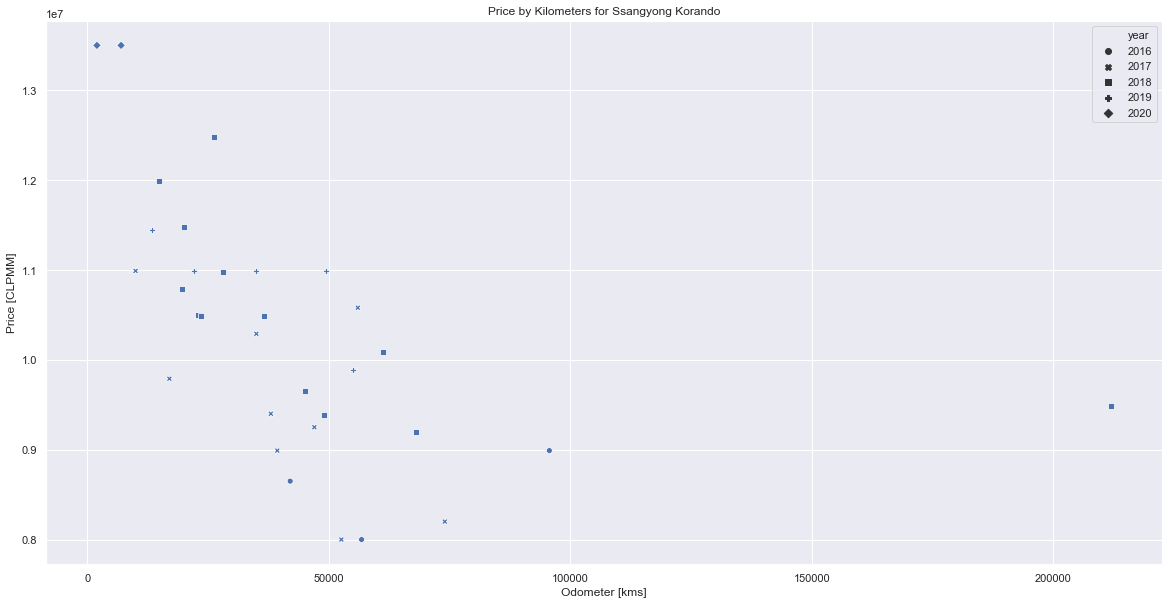

In [11]:
_ = plt.figure(figsize=(20, 10))
_ = sns.scatterplot(x="odometer", y="price", data=df, style='year')
_ = plt.xlabel("Odometer [kms]")
_ = plt.ylabel("Price [CLPMM]")
_ = plt.title('Price by Kilometers for Ssangyong Korando')

In [27]:
tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 1440x720 with 0 Axes>

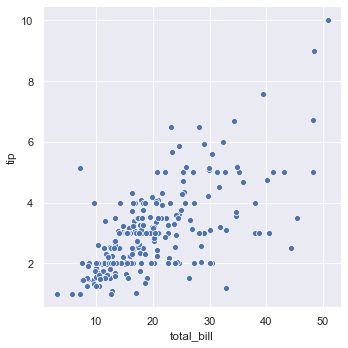

In [30]:
_ = plt.figure(figsize=(20,10))
_ = sns.relplot(x="total_bill", y="tip", data=tips);

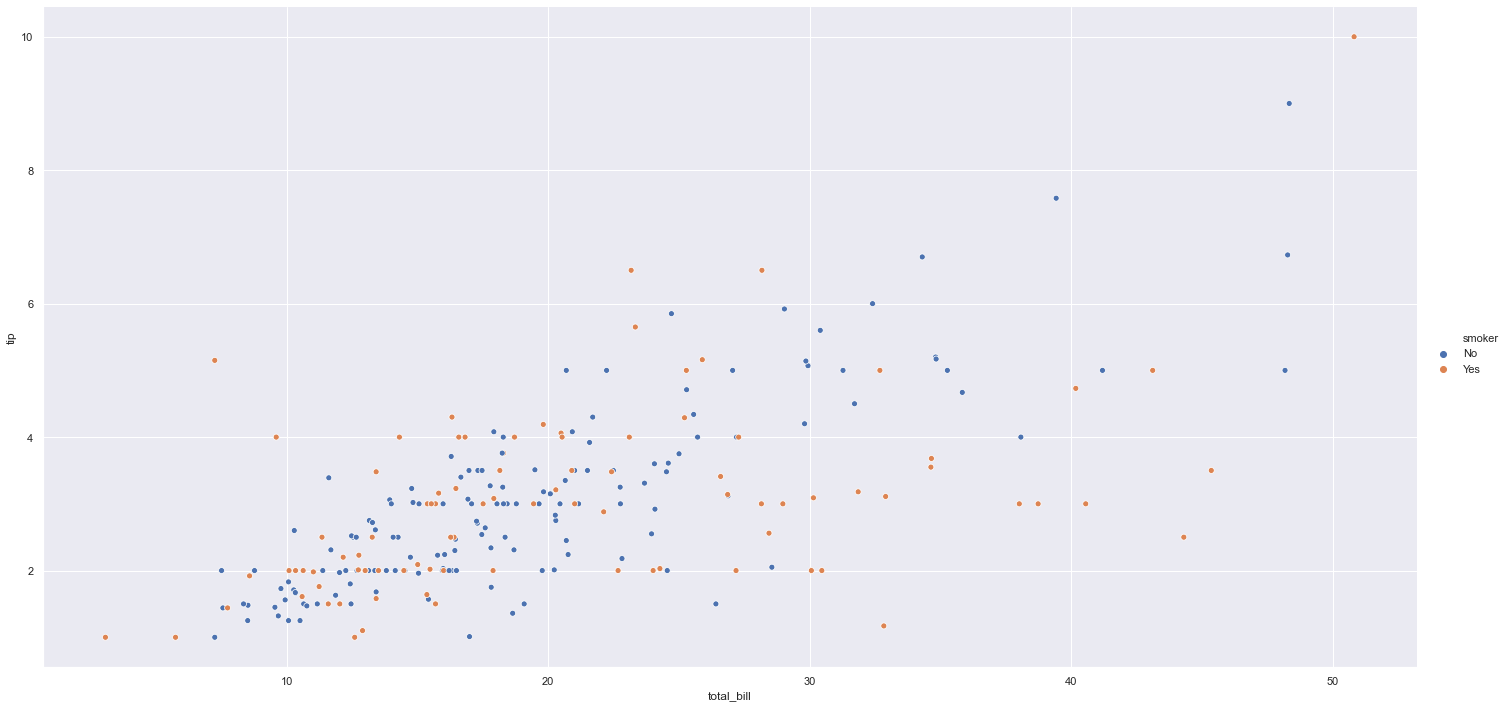

In [51]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips, height=10, aspect=10/5);

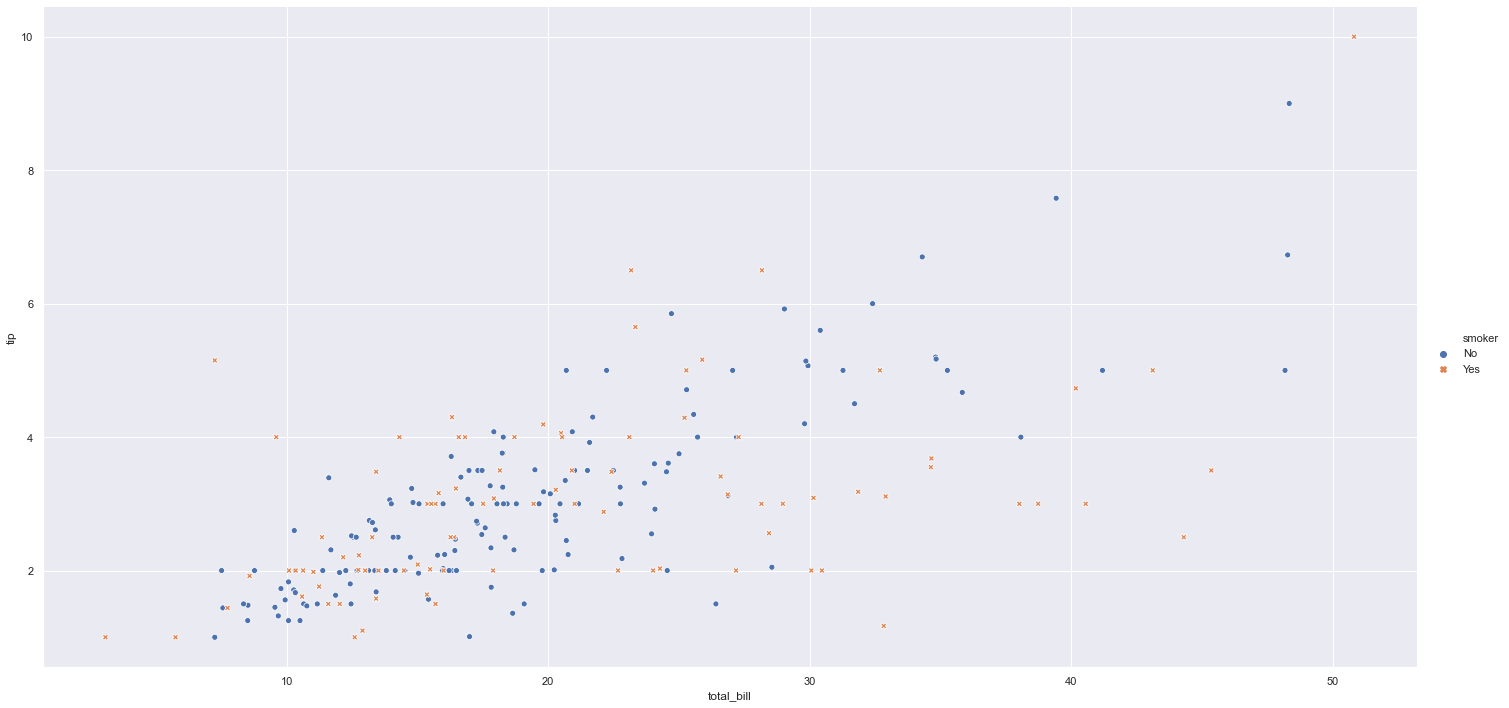

In [56]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips, height=10, aspect=10/5);

In [58]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


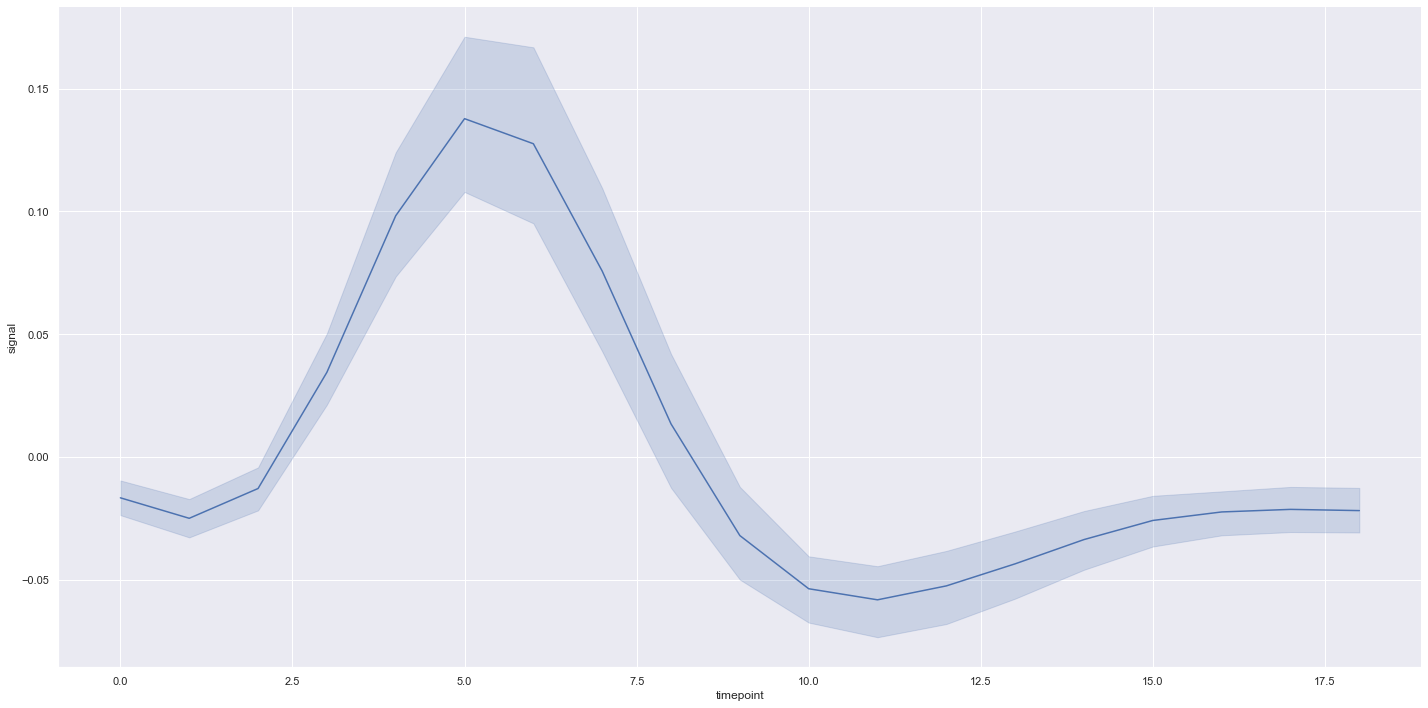

In [59]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, height=10, aspect=10/5);

In [60]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


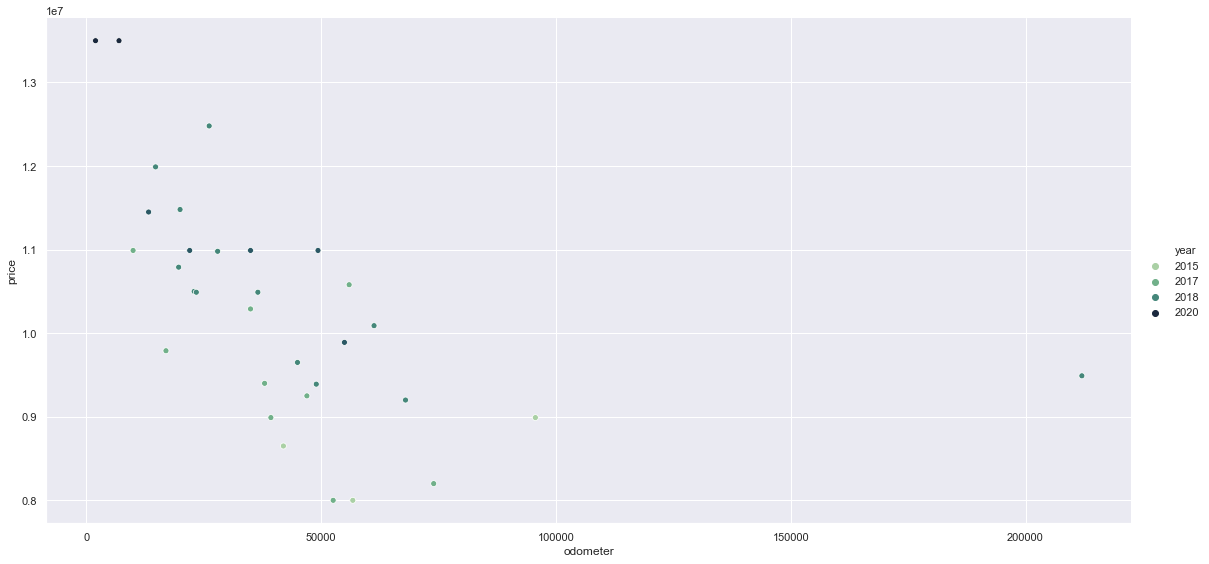

In [73]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="ch:r=-.5,l=.75");

In [85]:
sns.set_style(style='white')

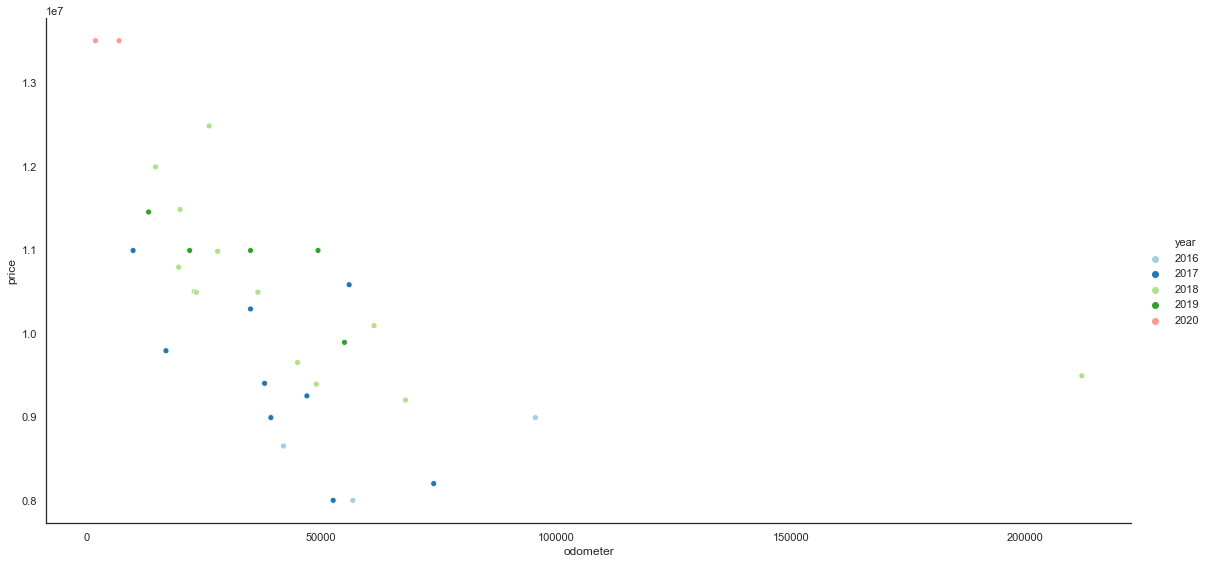

In [86]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="Paired");

In [91]:
sns.set_style(style='whitegrid')

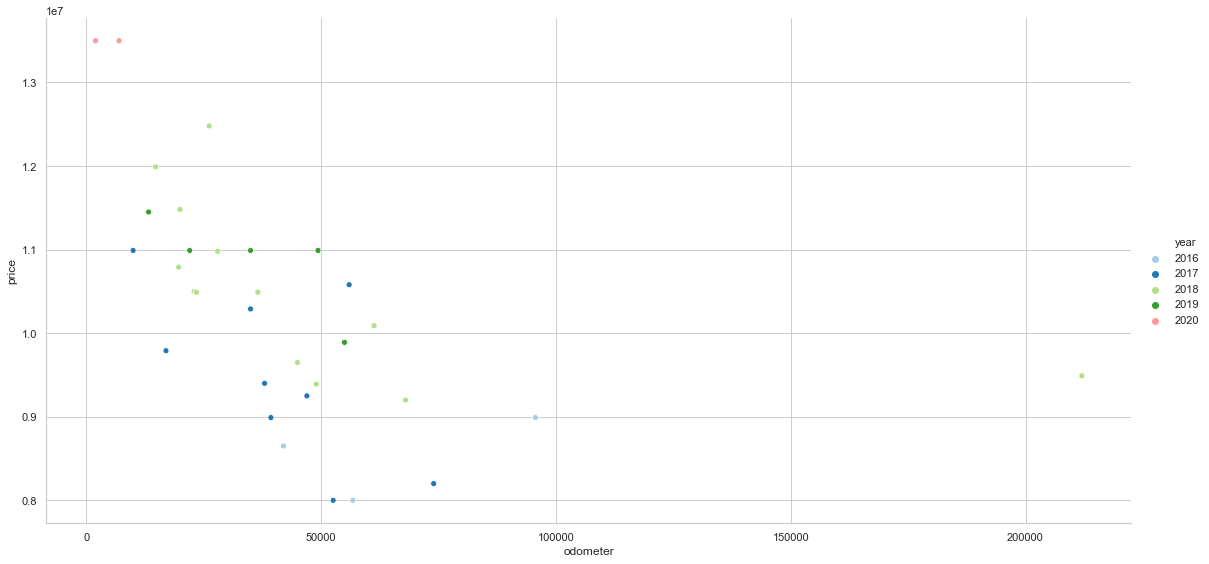

In [92]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="Paired");

In [94]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

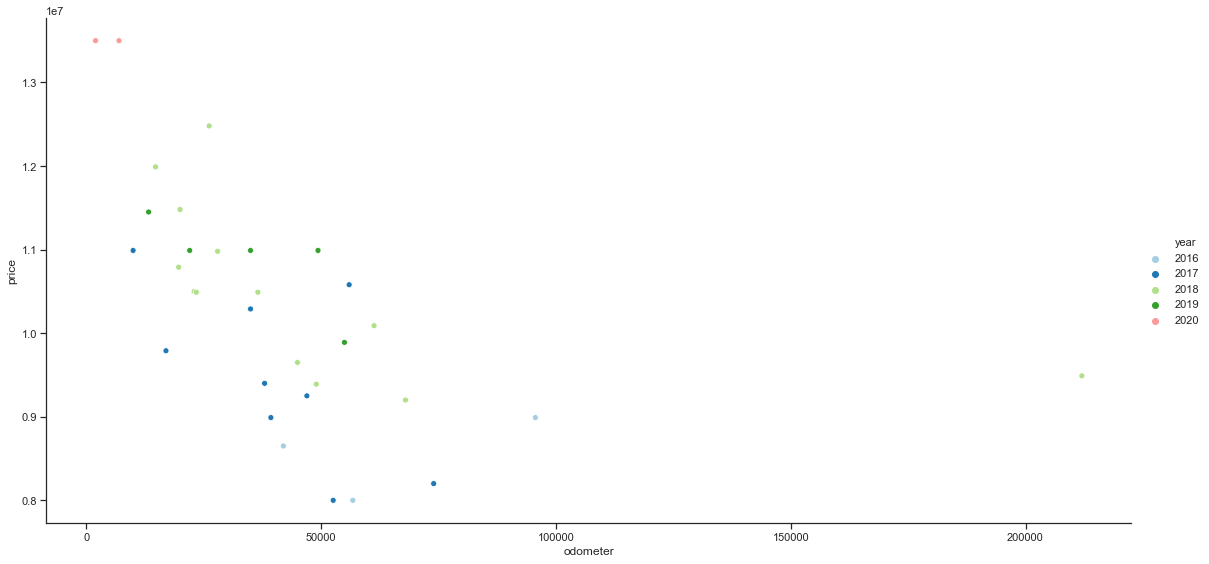

In [95]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="Paired");

In [96]:
sns.set_style(style="darkgrid")

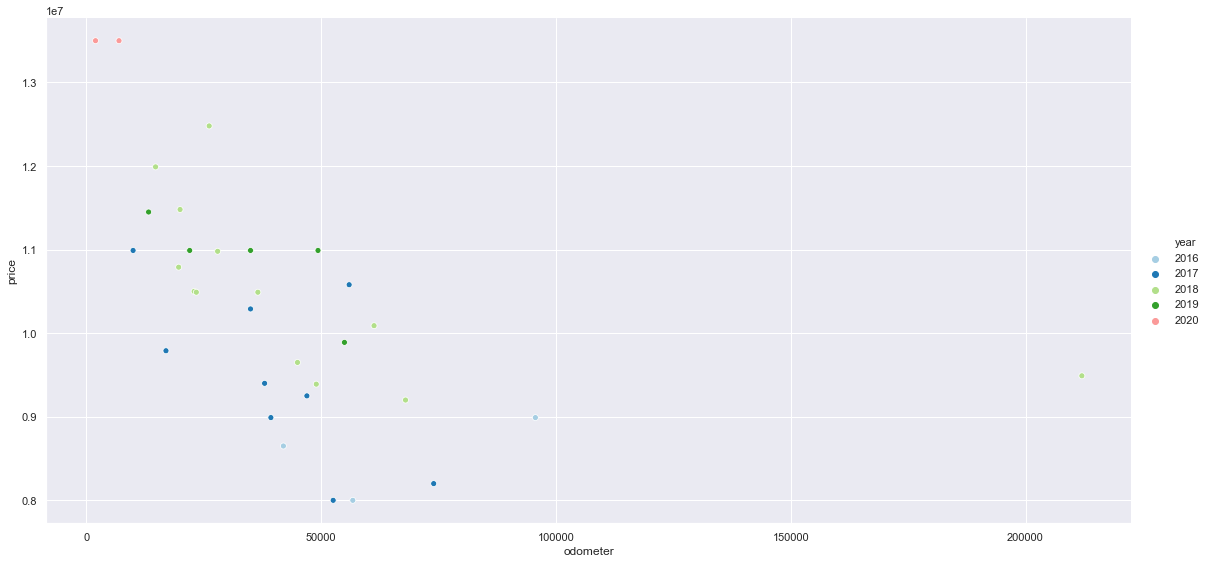

In [97]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="Paired");

In [98]:
sns.set_style(style="ticks")

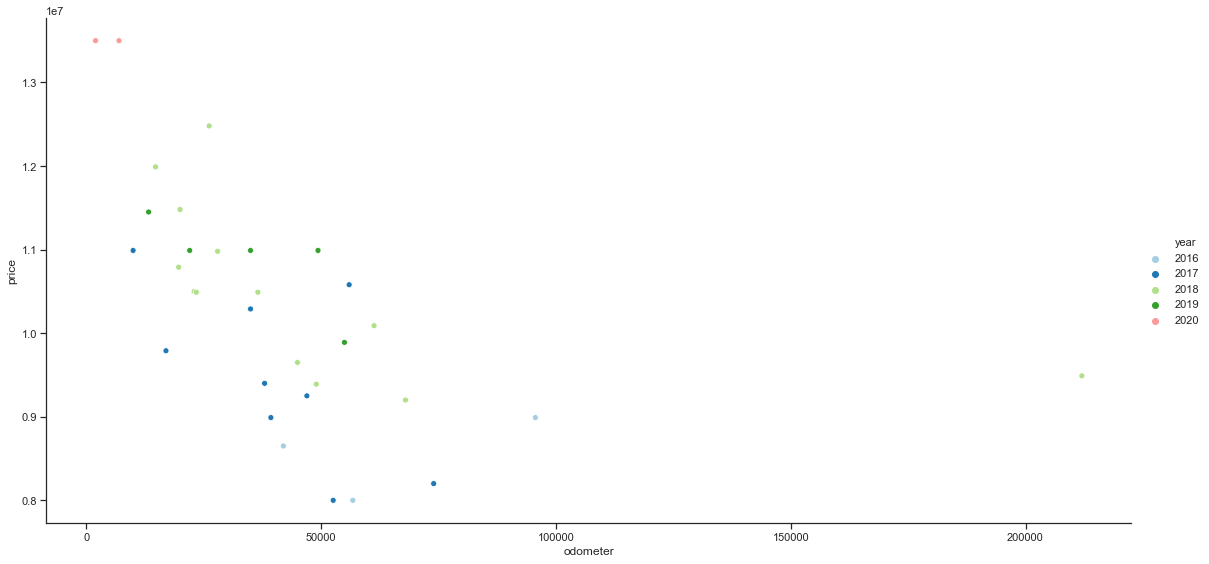

In [99]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="Paired");

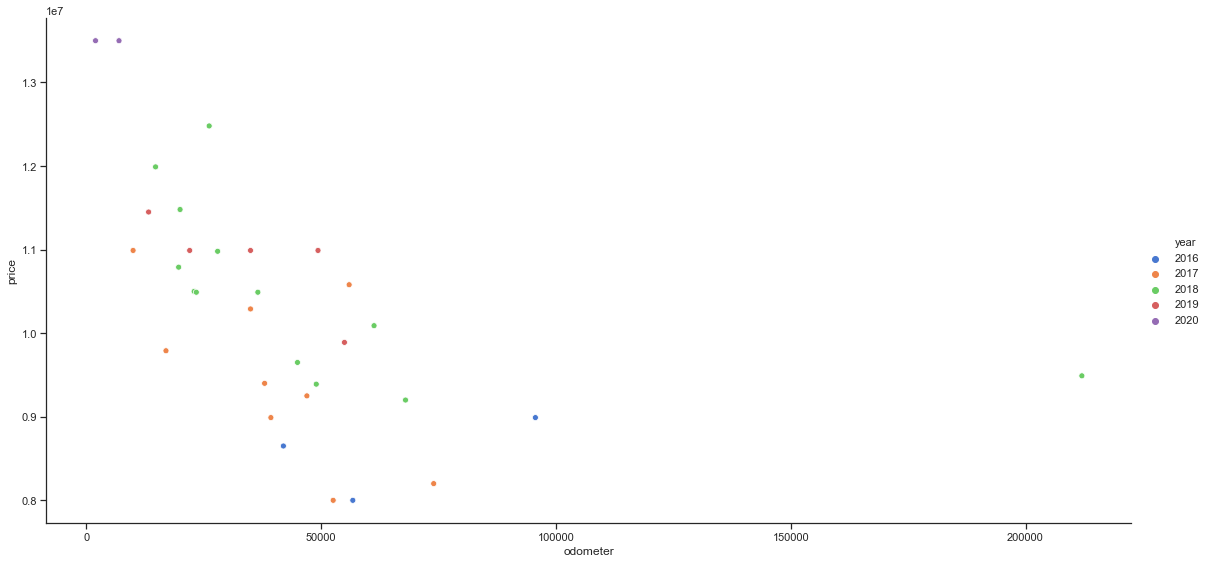

In [105]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="muted");

In [106]:
url = "https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/korando/"
items = scraper(url, pagination_limit=50)

[main] [INFO] [28-Aug-20 00:54:22] - Scraping [https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/korando/]
[main] [INFO] [28-Aug-20 00:54:23] - Pagination - URL = [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/korando/?offset=12]
[main] [INFO] [28-Aug-20 00:54:23] - Scraping [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/korando/?offset=12]
[main] [INFO] [28-Aug-20 00:54:24] - Pagination - URL = [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/korando/?offset=24]
[main] [INFO] [28-Aug-20 00:54:24] - Scraping [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/korando/?offset=24]
[main] [INFO] [28-Aug-20 00:54:25] - Pagination - URL = [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/korando/?offset=36]
[main] [INFO] [28-Aug-20 00:54:25] - Scraping [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/korando/?offset=36]
[main] [INFO] [28-Aug-20 00:54:25] - Pagination - URL = [https://www.chileautos

In [107]:
df = pd.DataFrame(items)
df.head()

,brand,model,net_id,price,state,seller_type,year,odometer,transmission,fuel_type,fuel_economy
0,SsangYong,Korando,CL-AD-8583754,7080000,Metropolitana de Santiago,Automotora Usado,2014,105.000 km,Manual,Diesel,"16,7 Kms/Lt."
1,SsangYong,Korando,CL-AD-8579436,7990000,Metropolitana de Santiago,Automotora Usado,2013,102.000 km,Automática,Diesel,"16,4 Kms/Lt."
2,SsangYong,Korando,CL-AD-8614538,6000000,Metropolitana de Santiago,Automotora Usado,2011,96.769 km,Manual,Diesel,NaN
3,SsangYong,Korando,CL-AD-8433530,7590000,Valparaíso,Automotora Usado,2014,125.000 km,Manual,Diesel,"15,6 Kms/Lt."
4,SsangYong,Korando,CL-AD-8634086,7490000,Maule,Automotora Usado,2014,NaN,Automática,Diesel,NaN


In [108]:
df.odometer = df.odometer.str.replace('.', '').str.extract('(\d+)')
df.odometer = pd.to_numeric(df.odometer, errors='coerce')
# df.year = pd.to_numeric(df.year, errors='coerce')
df.price = pd.to_numeric(df.price, errors='coerce')
df.head()

,brand,model,net_id,price,state,seller_type,year,odometer,transmission,fuel_type,fuel_economy
0,SsangYong,Korando,CL-AD-8583754,7080000,Metropolitana de Santiago,Automotora Usado,2014,105000.0,Manual,Diesel,"16,7 Kms/Lt."
1,SsangYong,Korando,CL-AD-8579436,7990000,Metropolitana de Santiago,Automotora Usado,2013,102000.0,Automática,Diesel,"16,4 Kms/Lt."
2,SsangYong,Korando,CL-AD-8614538,6000000,Metropolitana de Santiago,Automotora Usado,2011,96769.0,Manual,Diesel,NaN
3,SsangYong,Korando,CL-AD-8433530,7590000,Valparaíso,Automotora Usado,2014,125000.0,Manual,Diesel,"15,6 Kms/Lt."
4,SsangYong,Korando,CL-AD-8634086,7490000,Maule,Automotora Usado,2014,NaN,Automática,Diesel,NaN


In [109]:
df = df.sort_values(by='price')

In [110]:
df = df.iloc[:-1]

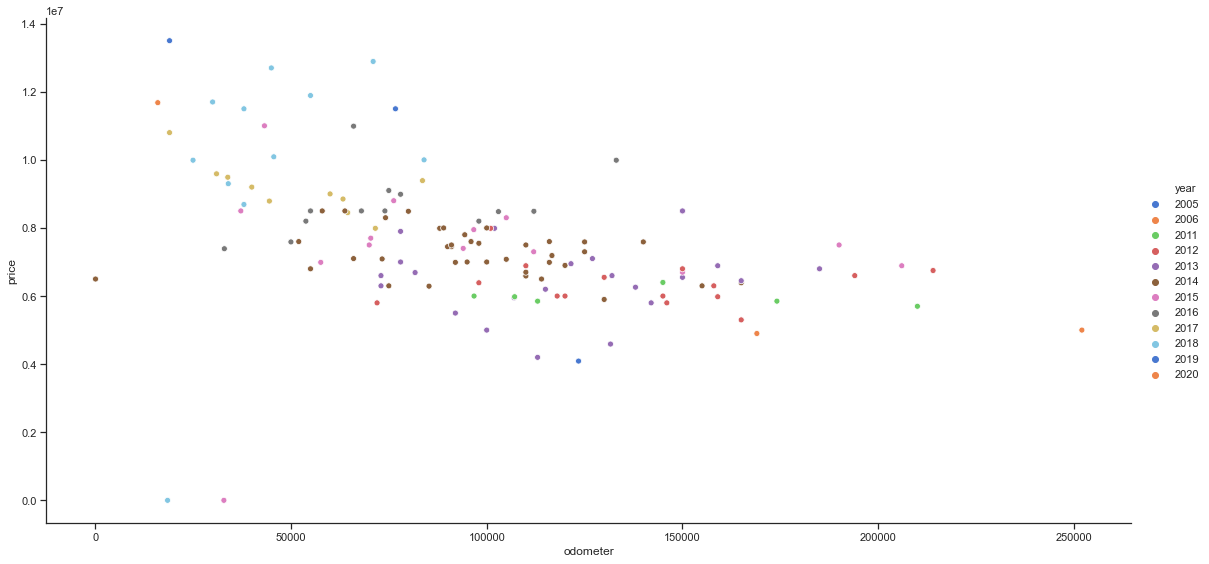

In [111]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="muted");

In [112]:
df.iloc[:5]

,brand,model,net_id,price,state,seller_type,year,odometer,transmission,fuel_type,fuel_economy
133,SsangYong,Korando,CL-AD-11060866,1,OHiggins,Particular,2018,18500.0,Manual,Diesel,"18,2 Kms/Lt."
145,SsangYong,Korando,CL-AD-8747820,1,Metropolitana de Santiago,Automotora Usado,2015,32880.0,Automática,Bencina,NaN
78,SsangYong,Korando,CL-AD-7999009,4090000,Araucanía,Particular,2005,123456.0,Manual,Diesel,NaN
100,SsangYong,Korando,CL-AD-11063044,4200000,Metropolitana de Santiago,Particular,2013,113000.0,Automática,Diesel,NaN
148,SsangYong,Korando,CL-AD-8747490,4590000,Bío Bío,Automotora Usado,2013,131618.0,Manual,Bencina,NaN


In [113]:
df = df.iloc[2:]

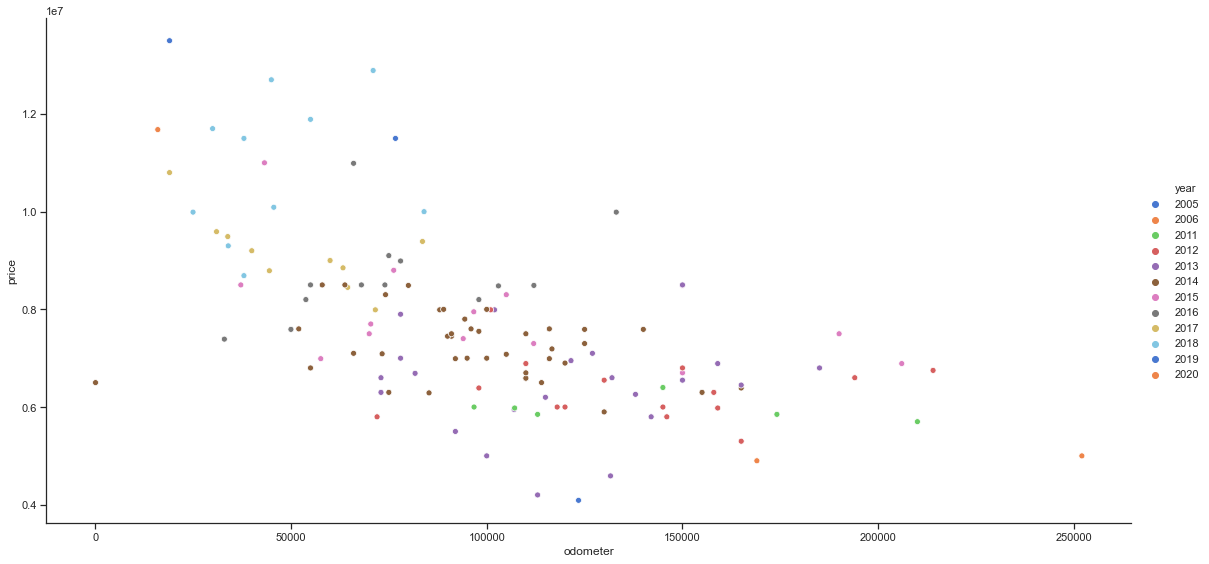

In [114]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="muted");

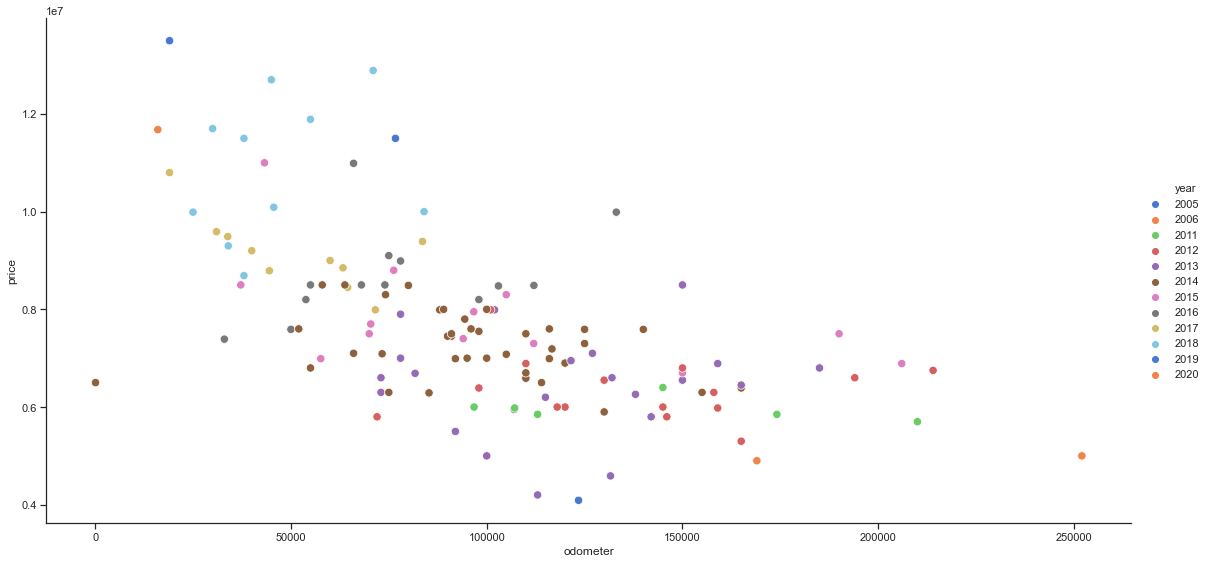

In [120]:
sns.relplot(x="odometer", y="price", data=df, height=8, hue="year", aspect=10/5, palette="muted", s=70);

In [121]:
url = "https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/tivoli/"
items = scraper(url, pagination_limit=50)

[main] [INFO] [28-Aug-20 01:06:31] - Scraping [https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/tivoli/]
[main] [INFO] [28-Aug-20 01:06:32] - Pagination - URL = [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/tivoli/?offset=12]
[main] [INFO] [28-Aug-20 01:06:32] - Scraping [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/tivoli/?offset=12]
[main] [INFO] [28-Aug-20 01:06:33] - Pagination - URL = [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/tivoli/?offset=24]
[main] [INFO] [28-Aug-20 01:06:33] - Scraping [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/tivoli/?offset=24]
[main] [INFO] [28-Aug-20 01:06:34] - Last page!


In [122]:
df = pd.DataFrame(items)
df.head()

,brand,model,net_id,price,state,seller_type,year,odometer,transmission,fuel_type,fuel_economy
0,SsangYong,Tivoli,CL-AD-8627537,8790000,Bío Bío,Automotora Usado,2016,61.600 km,Manual,Diesel,NaN
1,SsangYong,Tivoli,CL-AD-8739942,9900000,Metropolitana de Santiago,Automotora Usado,2017,34.900 km,Automática,Diesel,NaN
2,SsangYong,Tivoli,CL-AD-8734522,7990000,Metropolitana de Santiago,Automotora Usado,2018,25.412 km,Manual,Bencina,NaN
3,SsangYong,Tivoli,CL-AD-8623424,6490000,Los Lagos,Automotora Usado,2015,92.546 km,Manual,Bencina,NaN
4,SsangYong,Tivoli,CL-AD-8626562,9500000,Araucanía,Automotora Usado,2016,34.000 km,Automática,Diesel,NaN


In [123]:
df.odometer = df.odometer.str.replace('.', '').str.extract('(\d+)')
df.odometer = pd.to_numeric(df.odometer, errors='coerce')
# df.year = pd.to_numeric(df.year, errors='coerce')
df.price = pd.to_numeric(df.price, errors='coerce')
df.head()

,brand,model,net_id,price,state,seller_type,year,odometer,transmission,fuel_type,fuel_economy
0,SsangYong,Tivoli,CL-AD-8627537,8790000,Bío Bío,Automotora Usado,2016,61600.0,Manual,Diesel,NaN
1,SsangYong,Tivoli,CL-AD-8739942,9900000,Metropolitana de Santiago,Automotora Usado,2017,34900.0,Automática,Diesel,NaN
2,SsangYong,Tivoli,CL-AD-8734522,7990000,Metropolitana de Santiago,Automotora Usado,2018,25412.0,Manual,Bencina,NaN
3,SsangYong,Tivoli,CL-AD-8623424,6490000,Los Lagos,Automotora Usado,2015,92546.0,Manual,Bencina,NaN
4,SsangYong,Tivoli,CL-AD-8626562,9500000,Araucanía,Automotora Usado,2016,34000.0,Automática,Diesel,NaN


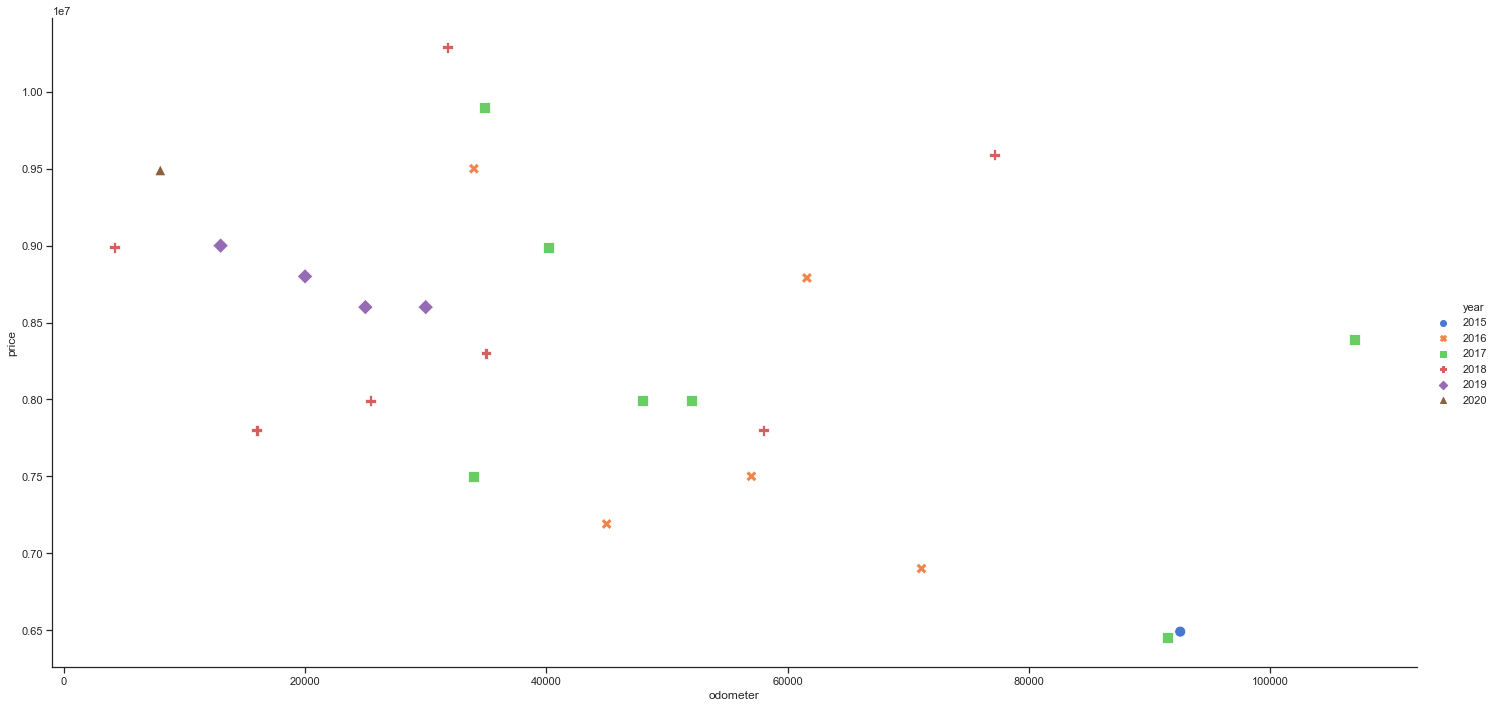

In [129]:
sns.relplot(x="odometer", y="price", data=df, height=10, aspect=10/5, s=120, palette="muted", hue="year", style="year");